# Task 2: 
## Item clustering (Part 2)

**Objetivo del notebook:** 


### Importación de las principales librerías

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time
from datetime import timedelta

# numeric and matrix operations
import math
import numpy as np
import pandas as pd

# scientific computations library
import scipy as sp

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, FunctionTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# import the function to compute cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

### Preprocessing para el Clustering

In [2]:
df_cluster = pd.read_csv('/Users/anapeyra/Desktop/NUCLIO/Entregables/TFM/stock-prediction-dsmarket/data_dsmarket/task_2_clustering/df_cluster_item_ready_ext.csv')

In [3]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item                        3049 non-null   object 
 1   item_exhibition_days        3049 non-null   int64  
 2   days_with_purchases         3049 non-null   int64  
 3   purchase_to_exhib_ratio     3049 non-null   float64
 4   units                       3049 non-null   int64  
 5   revenue                     3049 non-null   float64
 6   initial_sell_price          3049 non-null   float64
 7   first_discount              3049 non-null   float64
 8   days_until_first_discount   3049 non-null   int64  
 9   discount_on_date_days       3049 non-null   int64  
 10  week_sales_%                3049 non-null   float64
 11  weekend_sales_%             3049 non-null   float64
 12  summer_sales_%              3049 non-null   float64
 13  christmas_sales_%           3049 

In [4]:
df_cluster.isnull().sum().sum()

np.int64(33)

In [5]:
df_cluster.isnull().sum()

item                           0
item_exhibition_days           0
days_with_purchases            0
purchase_to_exhib_ratio        0
units                          0
revenue                        0
initial_sell_price             0
first_discount                 0
days_until_first_discount      0
discount_on_date_days          0
week_sales_%                   0
weekend_sales_%                0
summer_sales_%                 0
christmas_sales_%              0
event_sales_%                  0
event_SuperBowl_sales_%        0
event_Thanksgiving_sales_%     0
event_Ramadan_sales_%          0
event_NewYear_sales_%          0
event_Easter_sales_%           0
discount_on_date_sales_%       0
mean_pvp                       0
units_per_purchase             0
revenue_per_purchase           0
mean_discount                  0
2016_vs_2015                   0
2015_vs_2014                   1
2014_vs_2013                  32
category_id                    0
BOS_1_%                        0
BOS_2_%   

In [6]:
df_cluster["2015_vs_2014"] = df_cluster.groupby("item")["2015_vs_2014"].fillna(method="ffill").fillna(method="bfill")
df_cluster["2014_vs_2013"] = df_cluster.groupby("item")["2014_vs_2013"].fillna(method="ffill").fillna(method="bfill")

In [7]:
df_cluster.isnull().sum().sum()

np.int64(0)

In [8]:
df_cluster = df_cluster.round(5)
df_cluster.head()

,item,item_exhibition_days,days_with_purchases,purchase_to_exhib_ratio,units,revenue,initial_sell_price,first_discount,days_until_first_discount,discount_on_date_days,...,BOS_1_%,BOS_2_%,BOS_3_%,NYC_1_%,NYC_2_%,NYC_3_%,NYC_4_%,PHI_1_%,PHI_2_%,PHI_3_%
0,ACCESORIES_1_001,1013,973,0.96051,4093,45037.55,12.74,0.13736,-1,2589,...,6.35231,9.82165,9.40630,14.65917,13.24212,18.51942,15.51429,4.34889,2.80968,5.32617
1,ACCESORIES_1_002,1877,1619,0.86255,5059,26676.13,5.28,0.25189,1290,11,...,4.34869,5.93003,7.07650,9.74501,6.48349,8.93457,6.38466,22.59340,15.41807,13.08559
2,ACCESORIES_1_003,807,597,0.73978,1435,5652.09,7.94,0.00000,801,2729,...,6.89895,7.03833,12.40418,20.06969,10.10453,9.54704,11.21951,12.26481,7.45645,2.99652
3,ACCESORIES_1_004,1912,1900,0.99372,39143,235209.81,6.17,0.00000,1906,1039,...,7.53136,9.09997,8.10873,8.39997,19.14519,26.67654,4.05181,2.30437,1.46386,13.21820
4,ACCESORIES_1_005,1815,1765,0.97245,14621,55555.94,4.10,0.09091,150,1573,...,7.68757,13.78839,6.85316,12.64619,13.94569,18.21353,6.36071,9.05547,4.06949,7.37980


In [9]:
df_cluster.set_index("item", inplace = True)

In [10]:
df_cluster.head()

,item_exhibition_days,days_with_purchases,purchase_to_exhib_ratio,units,revenue,initial_sell_price,first_discount,days_until_first_discount,discount_on_date_days,week_sales_%,...,BOS_1_%,BOS_2_%,BOS_3_%,NYC_1_%,NYC_2_%,NYC_3_%,NYC_4_%,PHI_1_%,PHI_2_%,PHI_3_%
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,1013,973,0.96051,4093,45037.55,12.74,0.13736,-1,2589,66.72367,...,6.35231,9.82165,9.40630,14.65917,13.24212,18.51942,15.51429,4.34889,2.80968,5.32617
ACCESORIES_1_002,1877,1619,0.86255,5059,26676.13,5.28,0.25189,1290,11,64.87448,...,4.34869,5.93003,7.07650,9.74501,6.48349,8.93457,6.38466,22.59340,15.41807,13.08559
ACCESORIES_1_003,807,597,0.73978,1435,5652.09,7.94,0.00000,801,2729,62.09059,...,6.89895,7.03833,12.40418,20.06969,10.10453,9.54704,11.21951,12.26481,7.45645,2.99652
ACCESORIES_1_004,1912,1900,0.99372,39143,235209.81,6.17,0.00000,1906,1039,64.06509,...,7.53136,9.09997,8.10873,8.39997,19.14519,26.67654,4.05181,2.30437,1.46386,13.21820
ACCESORIES_1_005,1815,1765,0.97245,14621,55555.94,4.10,0.09091,150,1573,64.09274,...,7.68757,13.78839,6.85316,12.64619,13.94569,18.21353,6.36071,9.05547,4.06949,7.37980


### Selección de las variables

In [11]:
columns_1 = df_cluster.columns.to_list()
columns_1

['item_exhibition_days',
 'days_with_purchases',
 'purchase_to_exhib_ratio',
 'units',
 'revenue',
 'initial_sell_price',
 'first_discount',
 'days_until_first_discount',
 'discount_on_date_days',
 'week_sales_%',
 'weekend_sales_%',
 'summer_sales_%',
 'christmas_sales_%',
 'event_sales_%',
 'event_SuperBowl_sales_%',
 'event_Thanksgiving_sales_%',
 'event_Ramadan_sales_%',
 'event_NewYear_sales_%',
 'event_Easter_sales_%',
 'discount_on_date_sales_%',
 'mean_pvp',
 'units_per_purchase',
 'revenue_per_purchase',
 'mean_discount',
 '2016_vs_2015',
 '2015_vs_2014',
 '2014_vs_2013',
 'category_id',
 'BOS_1_%',
 'BOS_2_%',
 'BOS_3_%',
 'NYC_1_%',
 'NYC_2_%',
 'NYC_3_%',
 'NYC_4_%',
 'PHI_1_%',
 'PHI_2_%',
 'PHI_3_%']

In [12]:
order_columns = [
    'revenue',
    'revenue_per_purchase',
    'units',
    'units_per_purchase',
    'mean_pvp',
    'initial_sell_price',
                    
    'category_id',
    'item_exhibition_days',
    'days_with_purchases',
    'purchase_to_exhib_ratio',

    'mean_discount',
    'first_discount',
    'days_until_first_discount',
    'discount_on_date_days',
    'discount_on_date_sales_%',

    'week_sales_%',
    'weekend_sales_%',
    'summer_sales_%',
    'christmas_sales_%',

    'event_sales_%',
    'event_SuperBowl_sales_%',
    'event_Thanksgiving_sales_%',
    'event_Ramadan_sales_%',
    'event_NewYear_sales_%',
    'event_Easter_sales_%',

    '2016_vs_2015',
    '2015_vs_2014',
    '2014_vs_2013',

    'BOS_1_%',
    'BOS_2_%',
    'BOS_3_%',
    'NYC_1_%',
    'NYC_2_%',
    'NYC_3_%',
    'NYC_4_%',
    'PHI_1_%',
    'PHI_2_%',
    'PHI_3_%'
    ]

In [13]:
df_cluster = df_cluster.reindex(columns=order_columns)
df_cluster.head()

,revenue,revenue_per_purchase,units,units_per_purchase,mean_pvp,initial_sell_price,category_id,item_exhibition_days,days_with_purchases,purchase_to_exhib_ratio,...,BOS_1_%,BOS_2_%,BOS_3_%,NYC_1_%,NYC_2_%,NYC_3_%,NYC_4_%,PHI_1_%,PHI_2_%,PHI_3_%
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,45037.55,46.28731,4093,4.20658,11.00355,12.74,0,1013,973,0.96051,...,6.35231,9.82165,9.40630,14.65917,13.24212,18.51942,15.51429,4.34889,2.80968,5.32617
ACCESORIES_1_002,26676.13,16.47692,5059,3.12477,5.27300,5.28,0,1877,1619,0.86255,...,4.34869,5.93003,7.07650,9.74501,6.48349,8.93457,6.38466,22.59340,15.41807,13.08559
ACCESORIES_1_003,5652.09,9.46749,1435,2.40369,3.93874,7.94,0,807,597,0.73978,...,6.89895,7.03833,12.40418,20.06969,10.10453,9.54704,11.21951,12.26481,7.45645,2.99652
ACCESORIES_1_004,235209.81,123.79464,39143,20.60158,6.00899,6.17,0,1912,1900,0.99372,...,7.53136,9.09997,8.10873,8.39997,19.14519,26.67654,4.05181,2.30437,1.46386,13.21820
ACCESORIES_1_005,55555.94,31.47645,14621,8.28385,3.79974,4.10,0,1815,1765,0.97245,...,7.68757,13.78839,6.85316,12.64619,13.94569,18.21353,6.36071,9.05547,4.06949,7.37980


In [14]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3049 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     3049 non-null   float64
 1   revenue_per_purchase        3049 non-null   float64
 2   units                       3049 non-null   int64  
 3   units_per_purchase          3049 non-null   float64
 4   mean_pvp                    3049 non-null   float64
 5   initial_sell_price          3049 non-null   float64
 6   category_id                 3049 non-null   int64  
 7   item_exhibition_days        3049 non-null   int64  
 8   days_with_purchases         3049 non-null   int64  
 9   purchase_to_exhib_ratio     3049 non-null   float64
 10  mean_discount               3049 non-null   float64
 11  first_discount              3049 non-null   float64
 12  days_until_first_discount   3049 non-null   int64  
 13  discount_o

### Pipeline - Clusters por Item

Llegamos a este punto tenemos todo listo para construir nuestro pipeline.

Los pasos que va a realizar son:

1. Dado que en el primer paso, nos devuelve un array, usamos nuestro propio Transformer para convertir a DataFrame.

2. Estandarizamos los valores, usando un Scaler personalizado para eliminar la influencia de los outliers.

3. Hacemos un fit con KMeans para calcular la inertia de los grupos (la dispersión de los datos al centroide).

Técnica del ***Elbow Curve***: todo esto lo hacemos en una loop porque queremos ver cuando hay un cambio brusco en la inertia. Dicho de otro modo **aumentar más el número de centroides no nos sale a cuenta porque la ganacia marginal es muy pequeña.**

In [15]:
# De todas estas variables, vamos a seleccionar aquellas con las que vamso a segmentar los items:
selected_columns = [
                    #'revenue',
                    'revenue_per_purchase',
                    #'units',
                    'units_per_purchase',
                    'mean_pvp',
                    #'initial_sell_price',

                    #'category_id',
                    #'item_exhibition_days',
                    #'days_with_purchases',
                    'purchase_to_exhib_ratio',

                    'mean_discount',
                    #'first_discount',
                    #'days_until_first_discount',
                    #'discount_on_date_days',
                    #'discount_on_date_sales_%',

                    #'week_sales_%',
                    #'weekend_sales_%',
                    #'summer_sales_%',
                    #'christmas_sales_%',
                    #'event_sales_%',
                    #'event_SuperBowl_sales_%',
                    #'event_Thanksgiving_sales_%',
                    #'event_Ramadan_sales_%',
                    #'event_NewYear_sales_%',
                    #'event_Easter_sales_%',

                    '2016_vs_2015',
                    '2015_vs_2014',
                    '2014_vs_2013',

                    #'BOS_1_%',
                    #'BOS_2_%',
                    #'BOS_3_%',
                    #'NYC_1_%',
                    #'NYC_2_%',
                    #'NYC_3_%',
                    #'NYC_4_%',
                    #'PHI_1_%',
                    #'PHI_2_%',
                    #'PHI_3_%'
                    ]

In [16]:
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    '''
    Clase que transforma un array en un DataFrame.
    Necesita como parámetros el nombre de las columnas y el índice.
    '''
    
    def __init__(self, columns, index = None):
        self.columns = columns
        self.index = index
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        if self.index != None:
            df = pd.DataFrame(X, columns = self.columns, index = self.index)
            
        else:
            df = pd.DataFrame(X, columns = self.columns)
            
        return df

In [17]:
class OutlierFilter(BaseEstimator, TransformerMixin):
    '''
    Clase que filtra los outliers utilizando np.quantile()
    Los cuantiles a filtrar así como las columnas a filtrar son los parámetros de la clase.
    '''
    
    def __init__(self, q, col_to_filter):
        self.q = q
        self.col_to_filter = col_to_filter
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        '''
        El método considera outlier a aquel item que es outlier en TODAS las columnas que le pasas.
        '''
        
        # lista vacía
        criteria_list = []
        
        # agregamos a la lista los items que son outliers
        for col in self.col_to_filter:
            criteria = X[col] <= np.quantile(X[col], q = self.q)
            criteria_list.append(criteria)
            
        # si hay más de 1 columna
        if len(self.col_to_filter) > 1:
            
            # creamos el criterio global: es decir outlier en todas las columnas
            global_criteria = criteria_list[0]
            
            for criteria in criteria_list[1:]:
                global_criteria = global_criteria & criteria
                
        else:
            global_criteria = criteria_list[0]
            
        # filtramos nuestra dataframe
        X = X[global_criteria]
        
        # guardamos el índice como parámetro de la clase porque en caso contrario lo perderíamos.
        self.index = X.index
        
        return X

In [18]:
def scale_and_fit(df):
    columns = list(df.columns)
    index = list(df.index)
    pipe = Pipeline(steps = [
        ("Imputer", KNNImputer()), 
        ("ArrayToDataFrame", ArrayToDataFrame(columns = columns, index = index)),
        ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = selected_columns)),
        ("StandardScaler", StandardScaler())
        ])
    df_scaled_transformed = pipe.fit_transform(df)
    return df_scaled_transformed

In [19]:
## Elvow curve 
def plot_elbow_curve_and_find_optimal_k(df_scaled_transformed, threshold=0.05):
    sse = {}
    for k in range(2, 20):
        print(f"Fitting pipe with {k} clusters")
        clustering_model = KMeans(
            n_clusters=k,
            random_state=42,   # fija semilla
            n_init=10          # explícito (o "auto" según versión)
        )
        clustering_model.fit(df_scaled_transformed)
        sse[k] = clustering_model.inertia_
    # Elbow curve
    plt.figure(figsize = (16, 8))
    plt.plot(list(sse.keys()), list(sse.values()), label = "Inertia/dispersión de los clústers")
    plt.title("Variación de la dispersión de los clústers en función de la k")
    plt.show()
    
    # Optimal k
    keys = list(sse.keys())
    vals = list(sse.values())
    
    for i in range(1, len(keys)):
        ratio = (vals[i-1] - vals[i]) / vals[i-1]
        if ratio < threshold:
            print("El número óptimo de clusters es ", keys[i-1])
            return keys[i-1]
    print("El número óptimo de clusters es ", keys[-1])
    return keys[-1]


In [20]:
## Segmentación de los productos con la k adecuada
def cluster_and_predict(df, N_CLUSTERS):
    columns = list(df.columns)
    index = list(df.index)
    pipe = Pipeline(steps = [
        ("Imputer", KNNImputer()), 
        ("ArrayToDataFrame", ArrayToDataFrame(columns, index=index)),
        ("OutlierFilter", OutlierFilter(q=0.99, col_to_filter=selected_columns)),
        ("StandardScaler", StandardScaler()),
        ("Clustering", KMeans(
            n_clusters=N_CLUSTERS,
            random_state=42,
            n_init=10   # o "auto"
        ))
    ])
    pipe.fit(df)
    return pipe

In [21]:
df = df_cluster.copy()

In [22]:
df.shape

(3049, 38)

In [23]:
df.head()

,revenue,revenue_per_purchase,units,units_per_purchase,mean_pvp,initial_sell_price,category_id,item_exhibition_days,days_with_purchases,purchase_to_exhib_ratio,...,BOS_1_%,BOS_2_%,BOS_3_%,NYC_1_%,NYC_2_%,NYC_3_%,NYC_4_%,PHI_1_%,PHI_2_%,PHI_3_%
item,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,45037.55,46.28731,4093,4.20658,11.00355,12.74,0,1013,973,0.96051,...,6.35231,9.82165,9.40630,14.65917,13.24212,18.51942,15.51429,4.34889,2.80968,5.32617
ACCESORIES_1_002,26676.13,16.47692,5059,3.12477,5.27300,5.28,0,1877,1619,0.86255,...,4.34869,5.93003,7.07650,9.74501,6.48349,8.93457,6.38466,22.59340,15.41807,13.08559
ACCESORIES_1_003,5652.09,9.46749,1435,2.40369,3.93874,7.94,0,807,597,0.73978,...,6.89895,7.03833,12.40418,20.06969,10.10453,9.54704,11.21951,12.26481,7.45645,2.99652
ACCESORIES_1_004,235209.81,123.79464,39143,20.60158,6.00899,6.17,0,1912,1900,0.99372,...,7.53136,9.09997,8.10873,8.39997,19.14519,26.67654,4.05181,2.30437,1.46386,13.21820
ACCESORIES_1_005,55555.94,31.47645,14621,8.28385,3.79974,4.10,0,1815,1765,0.97245,...,7.68757,13.78839,6.85316,12.64619,13.94569,18.21353,6.36071,9.05547,4.06949,7.37980


In [24]:
df_scaled = scale_and_fit(df)

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Fitting pipe with 15 clusters
Fitting pipe with 16 clusters
Fitting pipe with 17 clusters
Fitting pipe with 18 clusters
Fitting pipe with 19 clusters


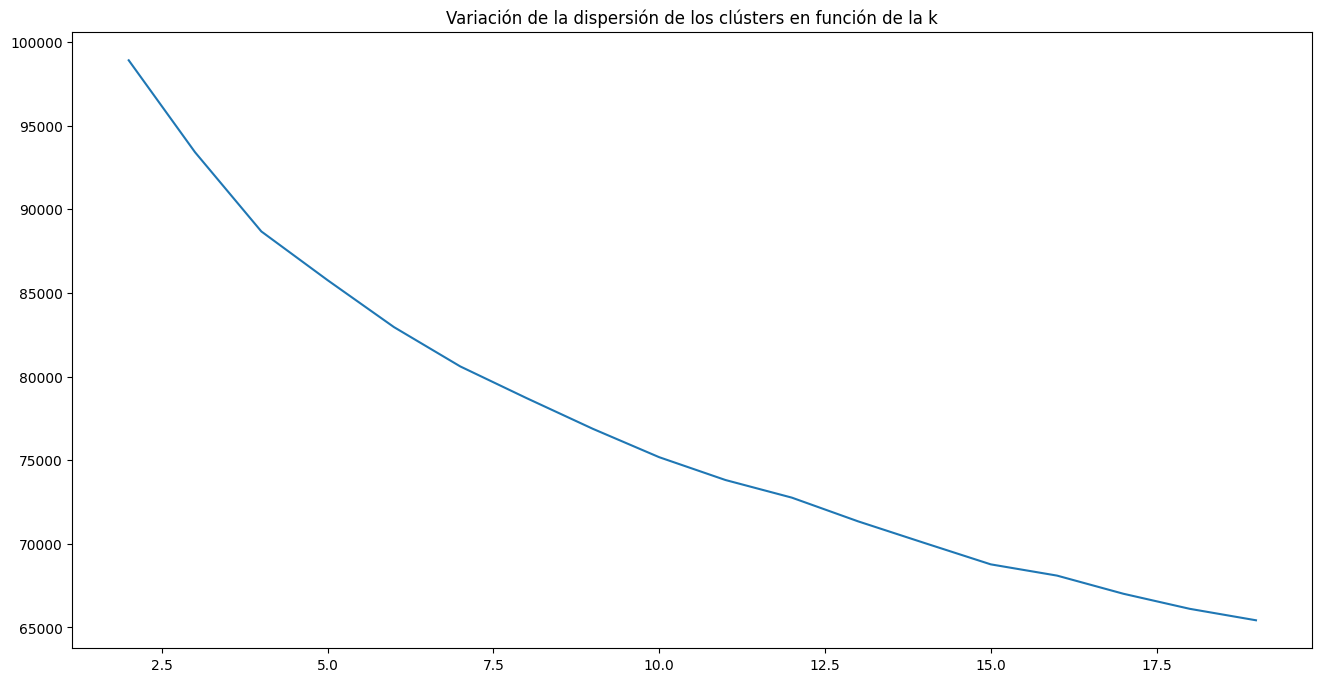

El número óptimo de clusters es  4


4

In [25]:
## Elvow curve
plot_elbow_curve_and_find_optimal_k(df_scaled)

In [26]:
N_CLUSTERS = 4

In [27]:
## Segmentación de los productos con la k adecuada
pipe = cluster_and_predict(df, N_CLUSTERS)
## Pipe (4/5):
X_processed = pipe[:2].transform(df) #sin escalar
X_scaled = pipe["StandardScaler"].transform(X_processed) #escalado
## Pipe (5/5): hacemos el predict, en este caso tendremos para cada item su centroide/clúster
labels = pipe["Clustering"].predict(X_scaled)
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

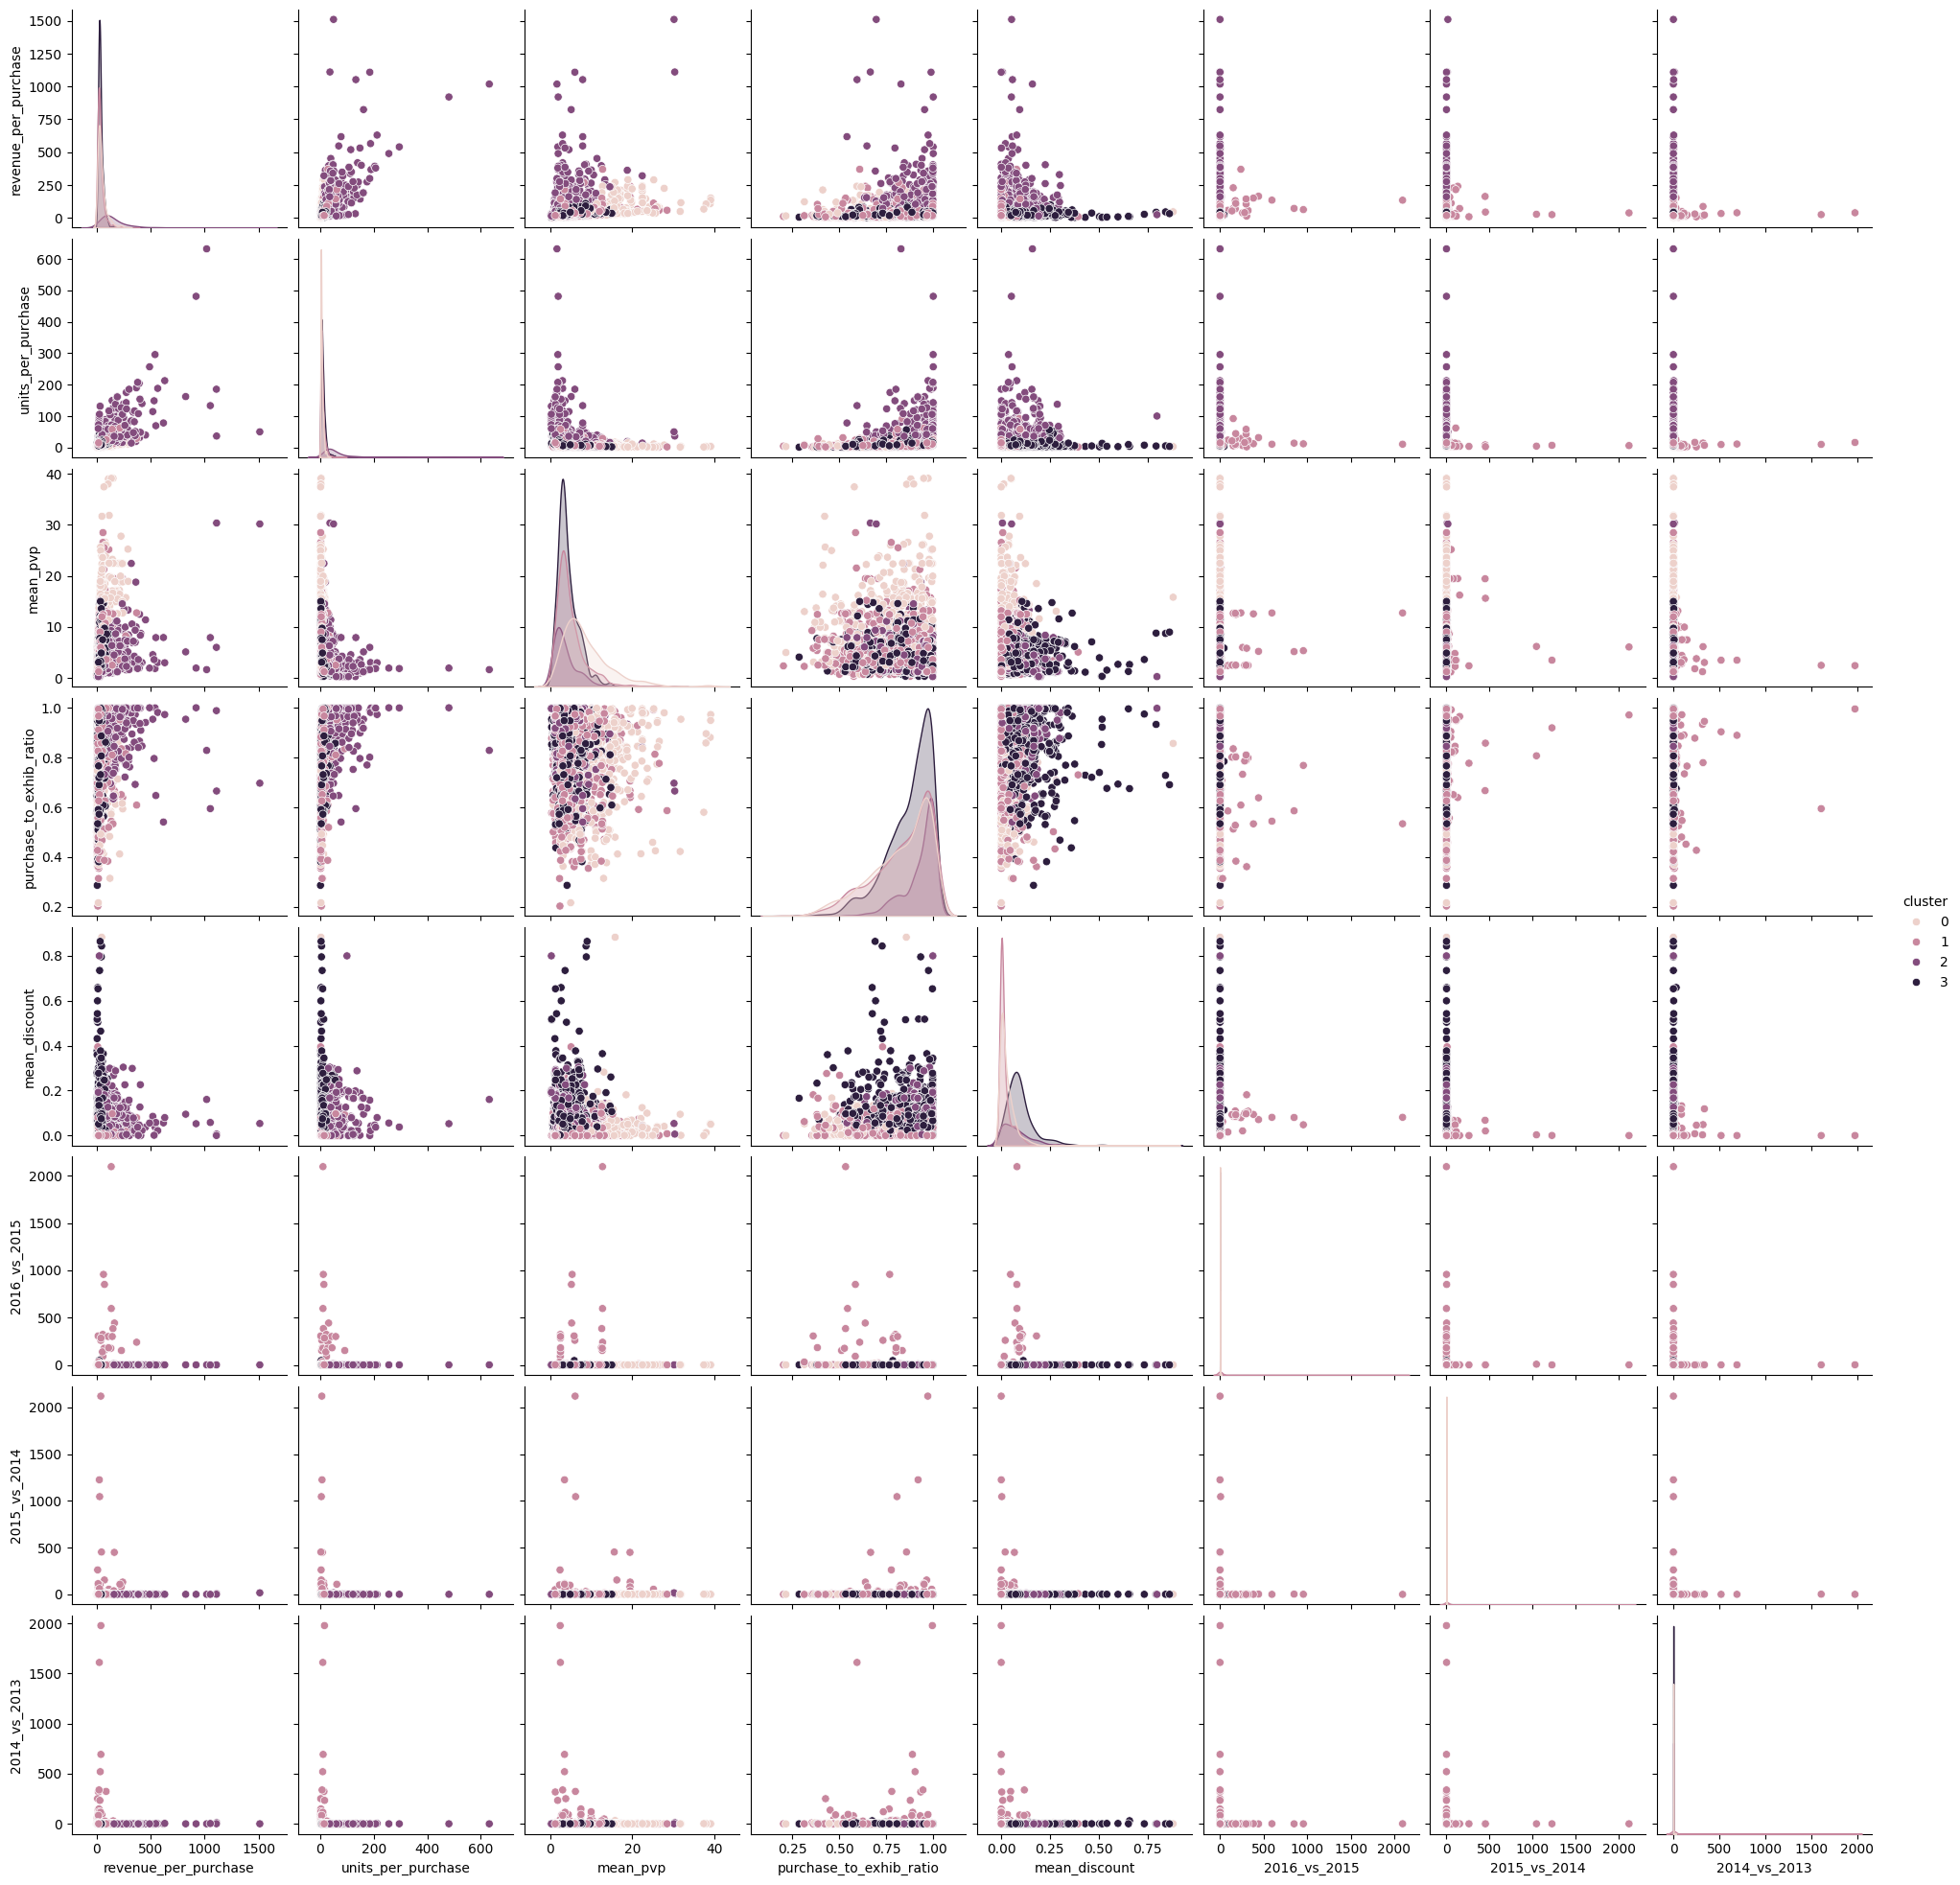

In [28]:
#-- Viz → variable relations
sns.pairplot(X_processed, vars = selected_columns, hue = 'cluster')

In [29]:
X_cluster = X_processed["cluster"]
X_cluster

ACCESORIES_1_001     3
ACCESORIES_1_002     1
ACCESORIES_1_003     3
ACCESORIES_1_004     0
ACCESORIES_1_005     3
                    ..
SUPERMARKET_3_823    3
SUPERMARKET_3_824    3
SUPERMARKET_3_825    3
SUPERMARKET_3_826    1
SUPERMARKET_3_827    1
Name: cluster, Length: 3049, dtype: int32

In [30]:
X_cluster.value_counts()

cluster
3    1039
1     829
0     821
2     360
Name: count, dtype: int64

#### Ficha de los productos

El último paso, usa vez que tenemos hecha nuestra segmentación completa es crear una ***ficha resumen*** de cada grupo con las principales variables de negocio o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los grupos o para enviar como documento al resto de los departamentos de la empresa.

In [31]:
ficha_df = pd.DataFrame()

In [32]:
ficha_df_list = []

for col in selected_columns:
    resumen_data = (
        X_processed[["cluster", col]]
        .groupby("cluster")
        .describe()
        .T[1:]
    )
    ficha_df_list.append(resumen_data)

ficha_df = pd.concat(ficha_df_list)


In [33]:
resumen_data

cluster                    0            1          2          3
2014_vs_2013 mean   0.162513    10.031977   0.066523   0.144978
             std    1.579714    96.732264   0.826918   1.384304
             min   -1.000000    -0.997430  -0.929590  -0.919720
             25%   -0.165450     0.000000  -0.218335  -0.221425
             50%   -0.041990     0.000000  -0.073610  -0.065590
             75%    0.131720     0.536700   0.095410   0.143030
             max   32.200000  1978.000000  11.152320  30.428570

In [34]:
# generamos nuestro multiindex
out_index = [
    #'Revenue',
    'Revenue',
    #'Unidades',
    "Unidades",
    "Precio",
    #"Precio_inicial",

    #"Categoría",
    #"Rendimiento de ventas",
    #"Rendimiento de ventas",
    "Rendimiento de ventas",

    "Descuento",
    #"Descuento",
    #"Descuento",
    #"Descuento",
    #"Descuento",

    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",
    #"Campaña",

    "Crecimiento",
    "Crecimiento",
    "Crecimiento",

    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    #"Tienda",
    ]

inner_index = selected_columns

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [35]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [36]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [37]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [38]:
ficha_df = pd.concat([ficha_df])

In [39]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

In [40]:
ficha_df = ficha_df.rename(columns = {
    0 : "Gama Premium",
    1 : "Rising",
    2 : "Best sellers",
    3 : "On Sale",
})

In [41]:
ficha_df.to_csv('/Users/anapeyra/Desktop/NUCLIO/Entregables/TFM/stock-prediction-dsmarket/data_dsmarket/task_2_clustering/item_clusters_4_report_230718_reduced.csv')

In [43]:
X_cluster = X_cluster.replace({
    0: "Gama Premium",
    1: "Rising",
    2: "Best sellers",
    3: "On Sale"
})


In [45]:
X_cluster.head()

ACCESORIES_1_001         On Sale
ACCESORIES_1_002          Rising
ACCESORIES_1_003         On Sale
ACCESORIES_1_004    Gama Premium
ACCESORIES_1_005         On Sale
Name: cluster, dtype: object

In [47]:
X_cluster.value_counts()

cluster
On Sale         1039
Rising           829
Gama Premium     821
Best sellers     360
Name: count, dtype: int64

In [48]:
X_cluster.to_csv('/Users/anapeyra/Desktop/NUCLIO/Entregables/TFM/stock-prediction-dsmarket/data_dsmarket/task_2_clustering/item_clusters_4_230718_reduced.csv', index=False)